<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,65.861245,43.716816,-0.004971,119.573090,119.578686,-0.005596
1,0.0,1.0,27.724328,91.926411,0.006851,129.657589,129.638301,0.019288
2,0.0,2.0,52.372838,48.519542,0.001654,110.894034,110.888857,0.005178
3,0.0,3.0,31.007551,93.776336,-0.000429,134.783458,134.772343,0.011116
4,0.0,4.0,86.152149,33.377931,-0.010384,129.519695,129.537064,-0.017368
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.975993,83.209783,0.004846,179.190622,179.181972,0.008650
59996,999.0,56.0,68.827353,32.837666,0.056620,111.721639,111.665231,0.056408
59997,999.0,57.0,93.798821,21.667358,-0.039576,125.426602,125.456367,-0.029765
59998,999.0,58.0,85.870362,82.146743,-0.008399,178.008706,178.013288,-0.004582


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,65.861245,43.716816,-0.004971,119.573090,119.578686,-0.005596
1,0.0,1.0,27.724328,91.926411,0.006851,129.657589,129.638301,0.019288
2,0.0,2.0,52.372838,48.519542,0.001654,110.894034,110.888857,0.005178
3,0.0,3.0,31.007551,93.776336,-0.000429,134.783458,134.772343,0.011116
4,0.0,4.0,86.152149,33.377931,-0.010384,129.519695,129.537064,-0.017368
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.975993,83.209783,0.004846,179.190622,179.181972,0.008650
59996,999.0,56.0,68.827353,32.837666,0.056620,111.721639,111.665231,0.056408
59997,999.0,57.0,93.798821,21.667358,-0.039576,125.426602,125.456367,-0.029765
59998,999.0,58.0,85.870362,82.146743,-0.008399,178.008706,178.013288,-0.004582


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    65.861245  43.716816 -0.004971  119.573090  119.578686 -0.005596
      1.0    27.724328  91.926411  0.006851  129.657589  129.638301  0.019288
      2.0    52.372838  48.519542  0.001654  110.894034  110.888857  0.005178
      3.0    31.007551  93.776336 -0.000429  134.783458  134.772343  0.011116
      4.0    86.152149  33.377931 -0.010384  129.519695  129.537064 -0.017368
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.975993  83.209783  0.004846  179.190622  179.181972  0.008650
      56.0   68.827353  32.837666  0.056620  111.721639  111.665231  0.056408
      57.0   93.798821  21.667358 -0.039576  125.426602  125.456367 -0.029765
      58.0   85.870362  82.146743 -0.008399  178.008706  178.013288 -0.004582
      59.0   41.107136  28.420119 -0.028494   79.498760   79.537762 -0.039002

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    65.861245  43.716816 -0.004971  119.573090  119.578686 -0.005596
      1.0    27.724328  91.926411  0.006851  129.657589  129.638301  0.019288
      2.0    52.372838  48.519542  0.001654  110.894034  110.888857  0.005178
      3.0    31.007551  93.776336 -0.000429  134.783458  134.772343  0.011116
      4.0    86.152149  33.377931 -0.010384  129.519695  129.537064 -0.017368
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.975993  83.209783  0.004846  179.190622  179.181972  0.008650
      56.0   68.827353  32.837666  0.056620  111.721639  111.665231  0.056408
      57.0   93.798821  21.667358 -0.039576  125.426602  125.456367 -0.029765
      58.0   85.870362  82.146743 -0.008399  178.008706  178.013288 -0.004582
      59.0   41.107136  28.420119 -0.028494   79.498760   79.537762 -0.039002

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,65.861245,43.716816,-0.004971,119.573090,119.578686,-0.005596
1,0.0,1.0,27.724328,91.926411,0.006851,129.657589,129.638301,0.019288
2,0.0,2.0,52.372838,48.519542,0.001654,110.894034,110.888857,0.005178
3,0.0,3.0,31.007551,93.776336,-0.000429,134.783458,134.772343,0.011116
4,0.0,4.0,86.152149,33.377931,-0.010384,129.519695,129.537064,-0.017368
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.975993,83.209783,0.004846,179.190622,179.181972,0.008650
59996,999.0,56.0,68.827353,32.837666,0.056620,111.721639,111.665231,0.056408
59997,999.0,57.0,93.798821,21.667358,-0.039576,125.426602,125.456367,-0.029765
59998,999.0,58.0,85.870362,82.146743,-0.008399,178.008706,178.013288,-0.004582


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    65.861245  43.716816 -0.004971  119.573090  119.578686 -0.005596
      1.0    27.724328  91.926411  0.006851  129.657589  129.638301  0.019288
      2.0    52.372838  48.519542  0.001654  110.894034  110.888857  0.005178
      3.0    31.007551  93.776336 -0.000429  134.783458  134.772343  0.011116
      4.0    86.152149  33.377931 -0.010384  129.519695  129.537064 -0.017368
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.975993  83.209783  0.004846  179.190622  179.181972  0.008650
      56.0   68.827353  32.837666  0.056620  111.721639  111.665231  0.056408
      57.0   93.798821  21.667358 -0.039576  125.426602  125.456367 -0.029765
      58.0   85.870362  82.146743 -0.008399  178.008706  178.013288 -0.004582
      59.0   41.107136  28.420119 -0.028494   79.498760   79.537762 -0.039002

[60000 rows x 6 columns]

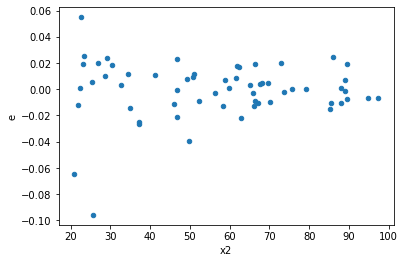

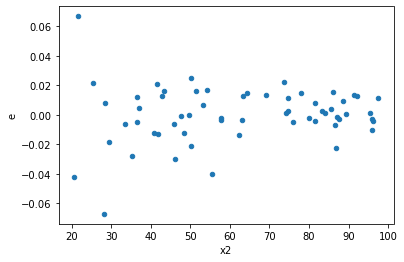

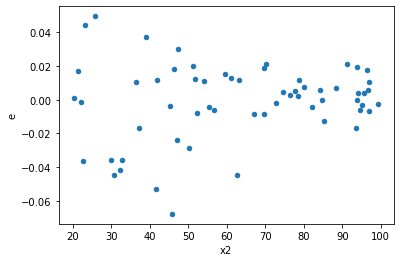

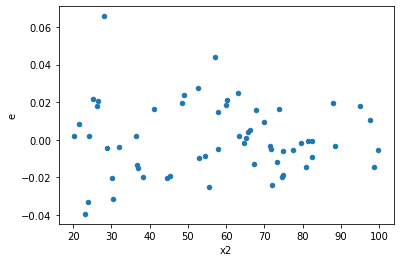

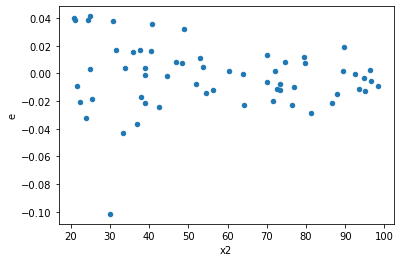

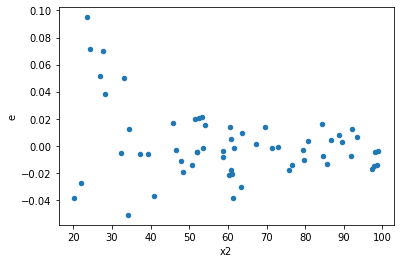

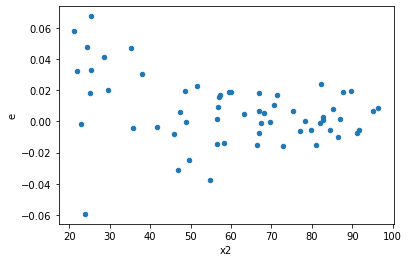

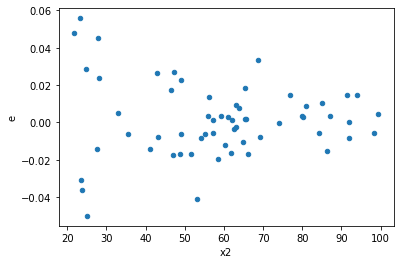

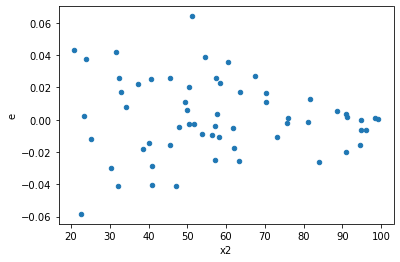

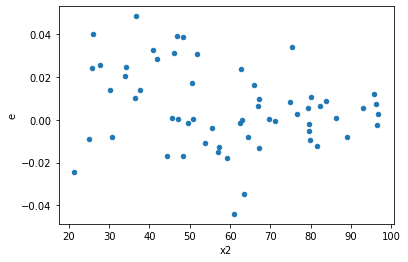

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.010291306377731221,0.003915602035521922,0.00046778665353323733,0.00017798191070554192,0.3804766753416916,0.027829077178925594,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.014068750498488105,0.003663193371589809,0.0006394886590221866,0.0001665087896177186,0.2603780180751285,0.0025756355774158085,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.018035032859442,0.0023309109169359246,0.0008197742208837272,0.00010595049622436021,0.12924350818222144,1.0325020927196442e-05,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.012113090033485617,0.002135335681773874,0.0005505950015220735,9.706071280790336e-05,0.17628331630252217,0.00013900254236475556,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.020103804266927053,0.002949441247667083,0.0009138092848603206,0.0001340655112575947,0.1467106030533353,3.064082469830832e-05,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.015946517078147426,0.006235490428724442,0.0007248416853703376,0.00028343138312383827,0.3910252250172766,0.03239078616436797,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.018630493246306456,0.00444344293769633,0.0008468406021048389,0.00020197467898619683,0.2385037733006481,0.0013876641607643554,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,0.020905173020284027,0.0014951031465172944,0.0009502351372856376,6.795923393260429e-05,0.07151833400597137,4.400022050951639e-08,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.03418239926133145,0.001729849130613255,0.0015537454209696114,7.862950593696613e-05,0.050606428103194386,1.455624824893676e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    983
Reject005=1 : Homoscedasticity       17
Name: Result_test, dtype: int64